# Desafio Titanic  - Modelo preditivo (morreu ou sobreviveu)


![title](img/titanic.jpg)

## Índice:

#### Introdução

#### Parte - 1
- Cálculo das probabilidade:
- Respostas:
- Análise por gráficos:
  - Comentários: (gráficos sobreviventes totais, homens e mulheres)
  - Comentários: (gráfico sobreviventes em relação sexo)
  - Verificando cruzamento dos dados entre a Classe dos tickets, Sexo e Sobreviventes:
  - Comentários:(Classe dos Tickets cruzado com Subreviventes)
  - Comentários:(Classe dos Tickets e Sexo cruzado com Subreviventes)
- Conclusão (Parte - 1):

#### Parte - 2
- Algoritmos de Predição:
- Coméntarios:(Modelo 1 - preditivo simples)
- Scikit - Learn (usando a biblioteca sklearn)
- Levando em consideração mais categorias
- Comentários:(modelo 2 e 3 - Regressão Logística com uma ou mais categorias)
- Conclusão geral (Resposta da última pergunta):

# Introdução

neste documento Jupyter Notebook foi realizado o levantamento das porcentagem pedidas e a idealização de dois modelos preditivos para responder a pergunta "Qual modelo eu tenho uma acurácia maior (porcentagem de acerto), um que fala que toda mulher morreu ou um que fala que toda mulher sobreviveu?" com embasamento científico:
- 1) modelo preditivo simples (hipotese, resultado)
- 2) modelo preditivo com Regressão logística

In [365]:
import pandas as pd
dados = pd.read_csv("dados_titanic.csv") #importando os dados

RANDOM_SEED = 88     # jeito que se embaralha os dados

#print(dados.shape)   # dimenssão da matriz de dados
#print(dados.count()) # possivel ver so os dados estão robusto o suficiente para analise 
dados.Sex = dados.Sex.astype('category')
dados.Sex.cat.categories = ('0', '1')

# Parte - 1

### Cálculo das probabilidade:

- P(sobreviver | mulher)  = 0.74
- P(morte | mulher) = 0.25
- P(sobreviver | homen) =  0.188
- P(morte | homen)  = 0.81

#### Respostas:

•	Qual a porcentagem de homens e mulheres no navio?

    Porcentagem de mulheres no navio: 0.35241301907968575
    Porcentagem de homens no navio: 0.6475869809203143

•	Dos que morreram, qual é a porcentagem de homens e mulheres? (espaço amostral: número de mortos)

    Porcentagem mortos que são homens: 0.8524590163934426
    Porcentagem mortas que são mulheres: 0.14754098360655737

In [366]:
print("------------------------------------- Totais -------------------------------------")
print("")
total_homens = dados.Sex.value_counts()[1]
total_mulheres = dados.Sex.value_counts()[0]
print('Total de homens no navio:',total_homens)
print('Total de mulheres no navio:',total_mulheres)
print('Total de pessoas no navio:',total_homens+total_mulheres)
percent_mulheres = total_mulheres/(total_homens+total_mulheres)
percent_mulheres
print('Porcentagem de mulheres no navio:',percent_mulheres)
percent_homens = total_homens/(total_homens+total_mulheres)
percent_homens
print('Porcentagem de homens no navio:',percent_homens)
total_mulheres_mortas = crosstab[0][0]
total_mulheres_mortas
print('total de mulheres mortas:',total_mulheres_mortas)
total_homens_mortos = crosstab[0][1]
total_homens_mortos
print('total de homens mortos:',total_homens_mortos)
percent_mortos = (total_homens_mortos + total_mulheres_mortas) / (total_homens+total_mulheres)
print('Porcentagem de mortos no navio:',percent_mortos)
percent_sobreviventes = 1-percent_mortos
print('Porcentagem de sobreviventes no navio:',percent_sobreviventes)
print("")
print("")
print("------------------------------------- Dados ------------------------------------")
print("")
percent_homens_vivos = (total_homens-total_homens_mortos)/(total_homens) #dentre o númeoro de homens
percent_mulheres_vivas = (total_mulheres-total_mulheres_mortas)/(total_mulheres) # dentre o número de mulheres
print('Porcentagem de homens vivos (espaço amostral homens):',percent_homens_vivos)
print('Porcentagem de mulheres vivas (espaço amostral mulheres):',percent_mulheres_vivas)

percent_homens_mortos_navio = total_homens_mortos/(total_homens)
percent_mulheres_mortas_navio = total_mulheres_mortas/(total_mulheres)
print('Porcentagem de homens mortos no navio:',percent_homens_mortos_navio)
print('Porcentagem de mulheres mortas no navio:',percent_mulheres_mortas_navio)

print("")
print("")
print("-------------------------------- Dos que morreram -------------------------------")
print("")
percent_homens_mortos = total_homens_mortos/(total_homens_mortos+total_mulheres_mortas)
print('Porcentagem de homens mortos:',percent_homens_mortos)
percent_mulheres_mortas = total_mulheres_mortas/(total_homens_mortos+total_mulheres_mortas)
print('Porcentagem de mulheres mortas:',percent_mulheres_mortas)
print("")

------------------------------------- Totais -------------------------------------

Total de homens no navio: 577
Total de mulheres no navio: 314
Total de pessoas no navio: 891
Porcentagem de mulheres no navio: 0.35241301907968575
Porcentagem de homens no navio: 0.6475869809203143
total de mulheres mortas: 81
total de homens mortos: 468
Porcentagem de mortos no navio: 0.6161616161616161
Porcentagem de sobreviventes no navio: 0.38383838383838387


------------------------------------- Dados ------------------------------------

Porcentagem de homens vivos (espaço amostral homens): 0.18890814558058924
Porcentagem de mulheres vivas (espaço amostral mulheres): 0.7420382165605095
Porcentagem de homens mortos no navio: 0.8110918544194108
Porcentagem de mulheres mortas no navio: 0.25796178343949044


-------------------------------- Dos que morreram -------------------------------

Porcentagem de homens mortos: 0.8524590163934426
Porcentagem de mulheres mortas: 0.14754098360655737



### Análise por gráficos:

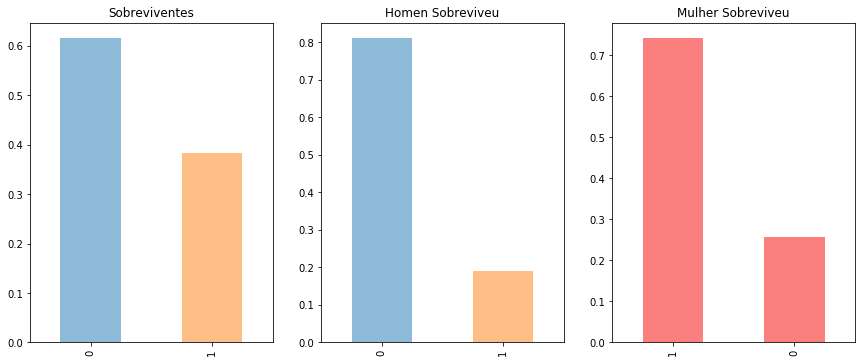

In [367]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))

plt.subplot2grid((3,4),(0,0))
dados.Survived.value_counts(normalize = True).plot(kind="bar",alpha = 0.5)
plt.title("Sobreviventes")

plt.subplot2grid((3,4),(0,1))
dados.Survived[dados.Sex == "1"].value_counts(normalize = True).plot(kind="bar",alpha = 0.5)
plt.title("Homen Sobreviveu")

plt.subplot2grid((3,4),(0,2))
dados.Survived[dados.Sex == "0"].value_counts(normalize = True).plot(kind="bar",alpha = 0.5, color="#FA0000" )
plt.title("Mulher Sobreviveu")

plt.show()

### Comentários:

##### (gráficos sobreviventes totais, homens e mulheres)

lembrando que para categoria sobreviventes, 1 é igual a sobreviveu e 0 é igual a morreu, é possivel observar no primeiro gráfico em barras, no geral, que 60% do passageiros morrerram e 40% dos passageiros sobreviveram. Além disso, analisando os outros dois gráficos podemos afirmar que mais de 80% do homens morreram e que um pouco mais de 25% das mulheres morreram. Em relação aos sobreviventes, menos de 20% dos homens e mais de 70% das mulheres sobreviveram.


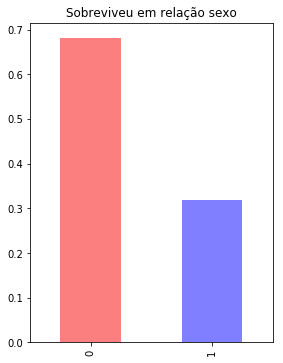

In [368]:
fig = plt.figure(figsize = (20,20))

plt.subplot2grid((3,4),(0,2))
dados.Sex[dados.Survived == 1].value_counts(normalize = True).plot(kind="bar",alpha = 0.5, color=["#FA0000", "b"] )
plt.title("Sobreviveu em relação sexo")

plt.show()

### Comentários:

##### (gráfico sobreviventes em relação sexo)

Com a o grafico acima é possivel observar que por volta de 65% dos sobreviventes são mulheres e que por volta de 35% são homens. Lembrando que para a informação do sexo 0 corresponde a mulher e 1 corresponde a homem

### Verificando cruzamento entre a Classe dos tickets, Sexo e Sobreviventes:

- pessoas que são mais ricas sobreviveram mais?
- pessoas que são mais ricas e mulheres sobreviveram mais?
- pessoas que são pobres e homens morreram mais? 

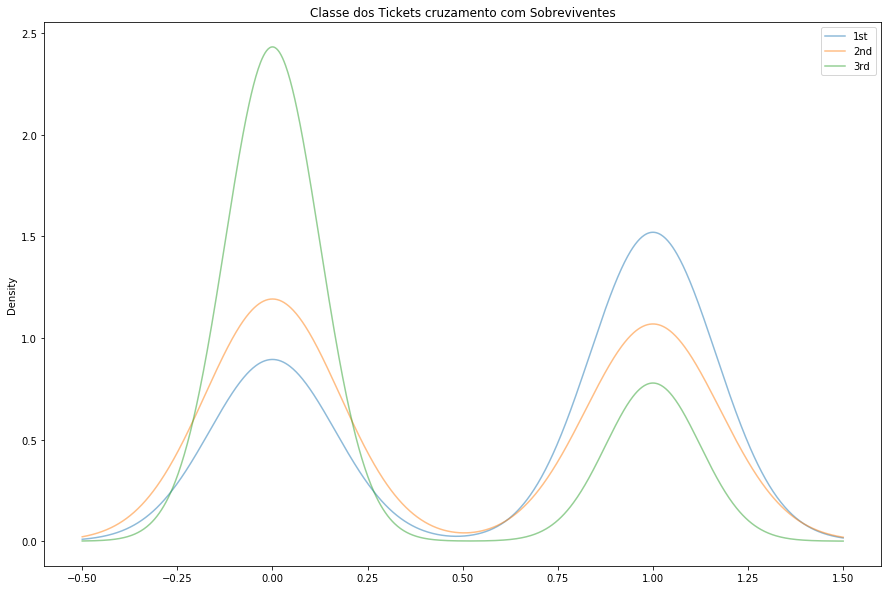

In [369]:
#Cruzamento da Classe dos tickets e Sobreviventes

fig = plt.figure(figsize = (15,10))

for x in [1,2,3]:
    dados.Survived[dados.Pclass == x].plot(kind = 'kde', alpha = 0.5)
plt.title("Classe dos Tickets cruzamento com Sobreviventes")
plt.legend(('1st','2nd','3rd'))
plt.show()

### Comentários:

###### (Classe dos Tickets correlacionado com Subreviventes)

No gráfico acima é possivel observar que a quantidade de passageiros da terceira classe (3rd - curva verde) que morreu é muito maior do que a quantidade de passageiros da preimeira classe (1st - curva azul). É interessante ressaltar que os dados relacionados a classe são discretos e que os dados dos sobreviventes são binários, assim, no gráfico kernel density estimate (kde) por favor desconsiderar as regiões transientes e apenas levar em consideração a região da abscissa 0 e 1

Text(0.5, 1.0, 'Mulheres pobres sobreviveu')

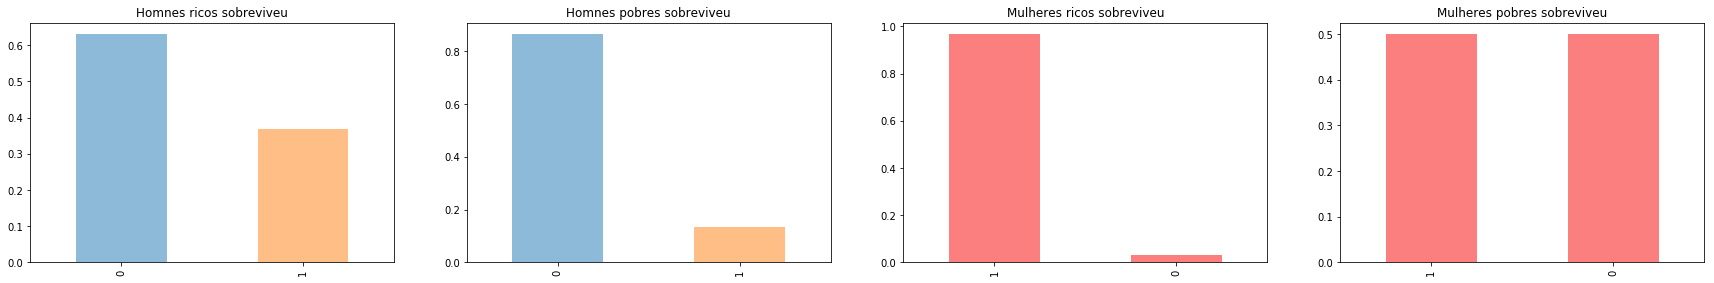

In [370]:
fig = plt.figure(figsize = (30,15))

plt.subplot2grid((3,4),(0,0))
dados.Survived[(dados.Sex == "1") & (dados.Pclass == 1)].value_counts(normalize = True).plot(kind="bar",alpha = 0.5)
plt.title("Homnes ricos sobreviveu")

plt.subplot2grid((3,4),(0,1))
dados.Survived[(dados.Sex == "1") & (dados.Pclass == 3)].value_counts(normalize = True).plot(kind="bar",alpha = 0.5)
plt.title("Homnes pobres sobreviveu")

plt.subplot2grid((3,4),(0,2))
dados.Survived[(dados.Sex == "0") & (dados.Pclass == 1)].value_counts(normalize = True).plot(kind="bar",alpha = 0.5, color="#FA0000")
plt.title("Mulheres ricos sobreviveu")

plt.subplot2grid((3,4),(0,3))
dados.Survived[(dados.Sex == "0") & (dados.Pclass == 3)].value_counts(normalize = True).plot(kind="bar",alpha = 0.5, color="#FA0000")
plt.title("Mulheres pobres sobreviveu")


### Comentários:

##### (Classe dos Tickets e Sexo correlacionado com Subreviventes)

Com esses quatro gráficos é visivel que pessoas com mais dinheiro tiveram mais chance de sobreviver. Os gráficos 1 e 3 mostram que 35% dos homens ricos e quase 100% das mulheres ricas sobreviveram. Em contrapartida, menos de 20% dos homens pobres sobreviveram e 50% das mulheres pobres sobreviveram.

### Conclusão (Parte - 1):

com a analise dos dados acima podemos inferir que o passageiro terá maior probabilidade sobreviver caso este seja mulher e rica  

# Parte - 2

### Algoritmos de Predição:

partindo do ponto acima que concluimos, segundo a analise dos dado, que caso você seja mulher você sobrevivirá e caso você seja homem você morrerá, é possivel realizar um algoritimo preditivo simples que retorne a acurácia dessa afirmação levando em cosideração o gênero. 

In [371]:
train = pd.read_csv("dados_titanic.csv")

#condicionado a estimativa
train["hipotese"] = 0
train.loc[train.Sex =="female","hipotese"] = 1 #forçando a criação de uma coluna com 1s cajo mulher

#checando a estimativa
train["resultado"] = 0
train.loc[train.Survived == train["hipotese"], "resultado"] = 1 #realizando a comparação da estimativa com os dados

print('Acurácia:',train["resultado"].value_counts(normalize=True)[1])

Acurácia: 0.7867564534231201


### Coméntarios:

###### (Modelo 1 - preditivo simples)

analisando o resultado desta etapa de predição é possivel afirmar que a probabilidade de afirmar que uma mulher sobrevive no desastre do  Titanic é de 78,67%.

### Scikit - Learn (usando a biblioteca sklearn)

A principal biblioteca para Machine Learning em Python chama-se Scikit-Learn, ou de modo abreviado sklearn. Com esta biblioteca podemos construir modelos de aprendizado de máquina bem sofisticados.


In [372]:
#transformando male = 1 e female = 0
train.Sex = train.Sex.astype('category')
train.Sex.cat.categories = ('0', '1')
train.Sex.value_counts()

y = train.Survived
X = train.loc[:,['Sex']] #levando em consideração apenas o gênero

from sklearn.model_selection import train_test_split
# Separando treinamento e teste: dividindo o conjunto de exemplos em duas partes: um conjunto de treinamento e um conjunto de testes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=RANDOM_SEED)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 1), (712,), (179, 1), (179,))

In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Calcula acurácia.
acc = accuracy_score(y_test, y_pred)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia do modelo regressão logística levando em conta apenas o sexo:')
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia do modelo regressão logística levando em conta apenas o sexo:
Acurácia: 0.7988826815642458


C:\Users\Pedro Casella.DESKTOP-T4HRM18.000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Levando em consideração mais categorias

para aumentar a acurácia do modelo preditivo serão levado em considerações além do sexo a Idade, a Classe do ticket do passageiro, a tarifa do ticket, o número de irmãos/cônjuges a bordo e número de pais/filhos a bordo

In [374]:
#tratando os dado que tem informação em branco e substituindo pelo valor médio da coluna
train["Fare"] = train["Fare"].fillna(train["Fare"].dropna().median())
train["Age"] = train["Age"].fillna(train["Age"].dropna().median())
 
y_novo = train.Survived
X_novo = train.loc[:,['Fare','Pclass','Age',"Sex","Parch","SibSp"]]

X_train_novo, X_test_novo, y_train_novo, y_test_novo = train_test_split(X_novo, y_novo, test_size=0.20, random_state=RANDOM_SEED)

model = LogisticRegression()
model.fit(X_train_novo, y_train_novo)
y_pred = model.predict(X_test_novo)
print('Acurácia do modelo regressão logística levando em conta a tarifa, classe do ticket, a idade, o sexo, o número de de irmãos/cônjuges a bordo e número de pais/filhos a bordo do Titanic:')
print('Acurácia: {}'.format(accuracy_score(y_test_novo, y_pred)))

Acurácia do modelo regressão logística levando em conta a tarifa, classe do ticket, a idade, o sexo, o número de de irmãos/cônjuges a bordo e número de pais/filhos a bordo do Titanic:
Acurácia: 0.8100558659217877


C:\Users\Pedro Casella.DESKTOP-T4HRM18.000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Comentários:

###### (modelo 2 e 3 - Regressão Logística com uma ou mais categorias)

Realizando a análise dessa etapa com os modelos preditivos 2 e 3 é possivel verificar que quando é levado em conta apenas a categoria Sexo, o modelo 2 apresenta um acurácia próxima do modelo 1 simples. Porém, quando são levados em conta outras categorias para correlacionar é possivel melhorar a acurácia do modelo em 2% aproximadamente

    

# Conclusão geral:

Com a analise dos dados tanto de maneira simples como fazendo o uso de ferramentas de machine learning podemos concluir que se tem maior acurácia quando o modelo menciona que toda mulher sobreviveu.

- modelo 1 - simples  => acurácia de 78,67%
- modelo 2 - regressão logística (levando em conta Sexo) => acurácia de 79,88%
- modelo 3 - regressão logística (levando em conta Sexo, tarifa ticket, classe do ticket numero de de irmãos/cônjuges a bordo e numero de pais/filhos a bordo do => acurácia de 81,0%

